# APPLIED STATISTICS(ECS764P) : COURSEWORK-3

NAME: OMKAR ANANT BARE

STUDENT NUMBER : 220459749

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import binom

In [2]:
# Functions required to generate QQ-Plot
def standardize(observation):
    z = (observation-np.mean(observation))/np.std(observation)
    return z

def get_quantiles(data):
    quantiles = []
    for q in np.arange(0, 1.001, 0.001):
        quantiles.append(np.quantile(data, q))
    return quantiles    

def pyqqplot(data1, data2):
    data1 = standardize(data1)
    data2 = standardize(data2)
    q1 = np.array(get_quantiles(data1))
    q2 = np.array(get_quantiles(data2))

    minim = min(data1.min(), data2.min())
    maxim = max(data1.max(), data2.max())
    return q1,q2, minim, maxim 

# Question 1 Solution:

In [3]:
# fix k = 3
k = 3

# instantiate an array N = [5, 10, 50]
N = [5, 10, 50]

# instantiate variable size = 100,000
size = 100000

In [4]:
# Using a for loop, for each value n in N sample a size × n array of samples from the distribution χ2(k)
x=[] # list to store the sample array of 'size x n'
for n in N:
    x.append(np.random.chisquare(df=k, size=(size, n)))

In [5]:
# Compute the sample average along each row for each N = [5, 10, 50]
means=[]  # list to store average along each row for each N
for i in range(len(x)):
    means.append(x[i].mean(axis=1))

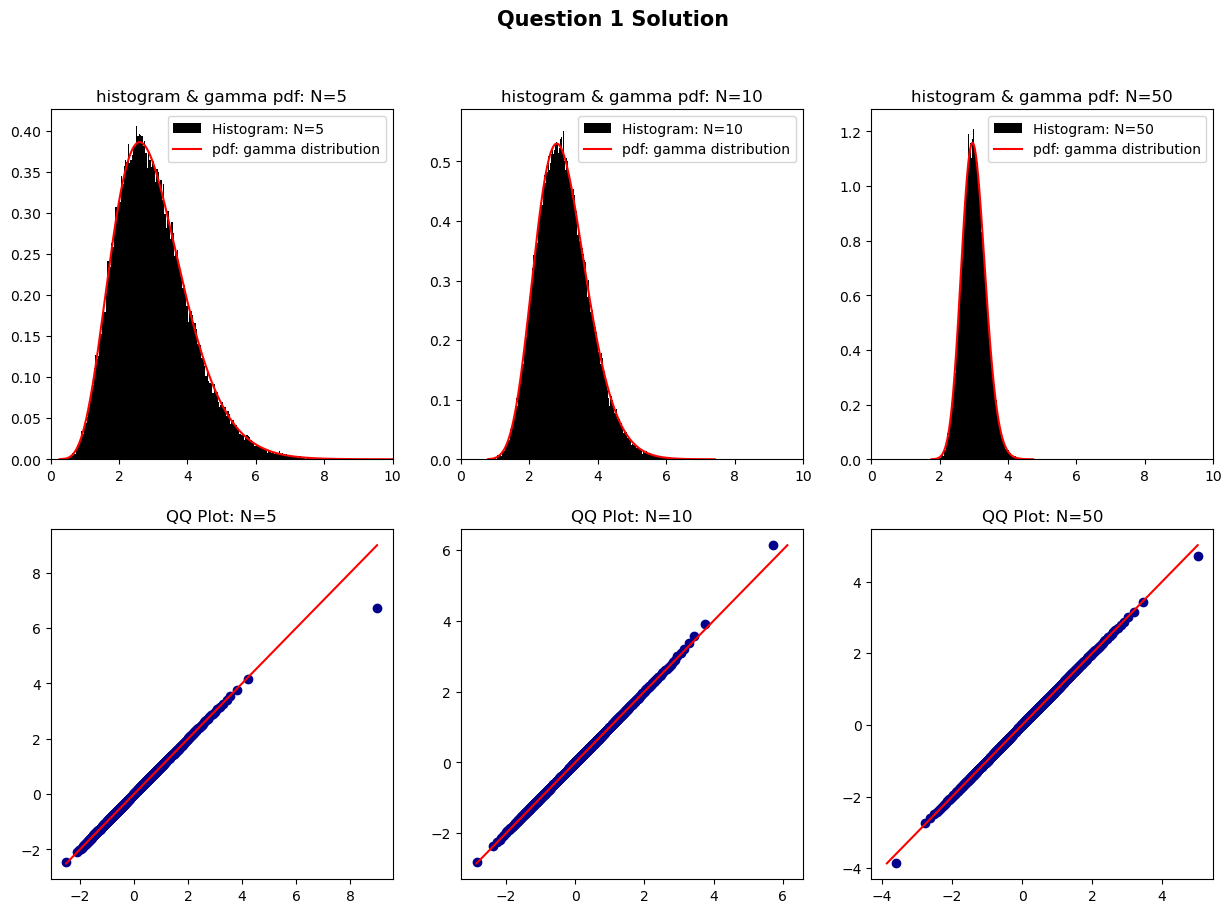

In [6]:
# Create a 2-by-3 array of subplots. 
fig, ((ax0,ax1,ax2), (ax3,ax4,ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Question 1 Solution', fontsize=15, fontweight='bold')

# Histogram and exact density given by gamma distribution for N=5 
shape0 = (N[0]*k)/2
scale0 = 2/N[0]
x0 = np.sort(means[0])
y0 = scipy.stats.gamma.pdf(np.sort(means[0]), a=shape0, scale=scale0)
ax0.hist(means[0], density=True, bins = int(np.sqrt(len(means[0]))), color='black', label='Histogram: N=5')
ax0.set(title ='histogram & gamma pdf: N=5')
ax0.axis(xmin=0,xmax=10)
ax0.plot(x0, y0, color='red', label='pdf: gamma distribution');
ax0.legend(); 
# QQ plot of the sample means versus their exact (Gamma) distribution for N=5
q1_0, q2_0, minim0, maxim0 = pyqqplot(np.sort(means[0]), scipy.stats.gamma.rvs(a=shape0, scale=scale0, size=size))
ax3.scatter(q1_0, q2_0, color='darkblue');
ax3.plot([minim0, maxim0], [minim0, maxim0], color='r');
ax3.set(title= 'QQ Plot: N=5');

# Histogram and exact density given by gamma distribution for N=10
shape1 = (N[1]*k)/2
scale1 = 2/N[1]
x1 = np.sort(means[1])
y1 = scipy.stats.gamma.pdf(np.sort(means[1]), a=shape1, scale=scale1)
ax1.hist(means[1], density=True, bins = int(np.sqrt(len(means[1]))), color='black', label='Histogram: N=10')
ax1.set(title ='histogram & gamma pdf: N=10')
ax1.axis(xmin=0,xmax=10)
ax1.plot(x1, y1, color='red', label='pdf: gamma distribution');
ax1.legend(); 
# QQ plot of the sample means versus their exact (Gamma) distribution for N=10
q1_1, q2_1, minim1, maxim1 = pyqqplot(np.sort(means[1]), scipy.stats.gamma.rvs(a=shape1, scale=scale1, size=size))
ax4.scatter(q1_1, q2_1, color='darkblue');
ax4.plot([minim1, maxim1], [minim1, maxim1], color='r');
ax4.set(title= 'QQ Plot: N=10');

# Histogram and exact density given by gamma distribution for N=50
shape2 = (N[2]*k)/2
scale2 = 2/N[2]
x2 = np.sort(means[2])
y2 = scipy.stats.gamma.pdf(np.sort(means[2]), a=shape2, scale=scale2)
ax2.hist(means[2], density=True, bins = int(np.sqrt(len(means[2]))), color='black', label='Histogram: N=50')
ax2.set(title = 'histogram & gamma pdf: N=50')
ax2.axis(xmin=0,xmax=10)
ax2.plot(x2, y2, color='red', label='pdf: gamma distribution');
ax2.legend(); 
# QQ plot of the sample means versus their exact (Gamma) distribution for N=50
q1_2, q2_2, minim2, maxim2 = pyqqplot(np.sort(means[2]), scipy.stats.gamma.rvs(a=shape2, scale=scale2, size=size))
ax5.scatter(q1_2, q2_2, color='darkblue');
ax5.plot([minim2, maxim2], [minim2, maxim2], color='r');
ax5.set(title= 'QQ Plot: N=50');

# Question 2 Solution:

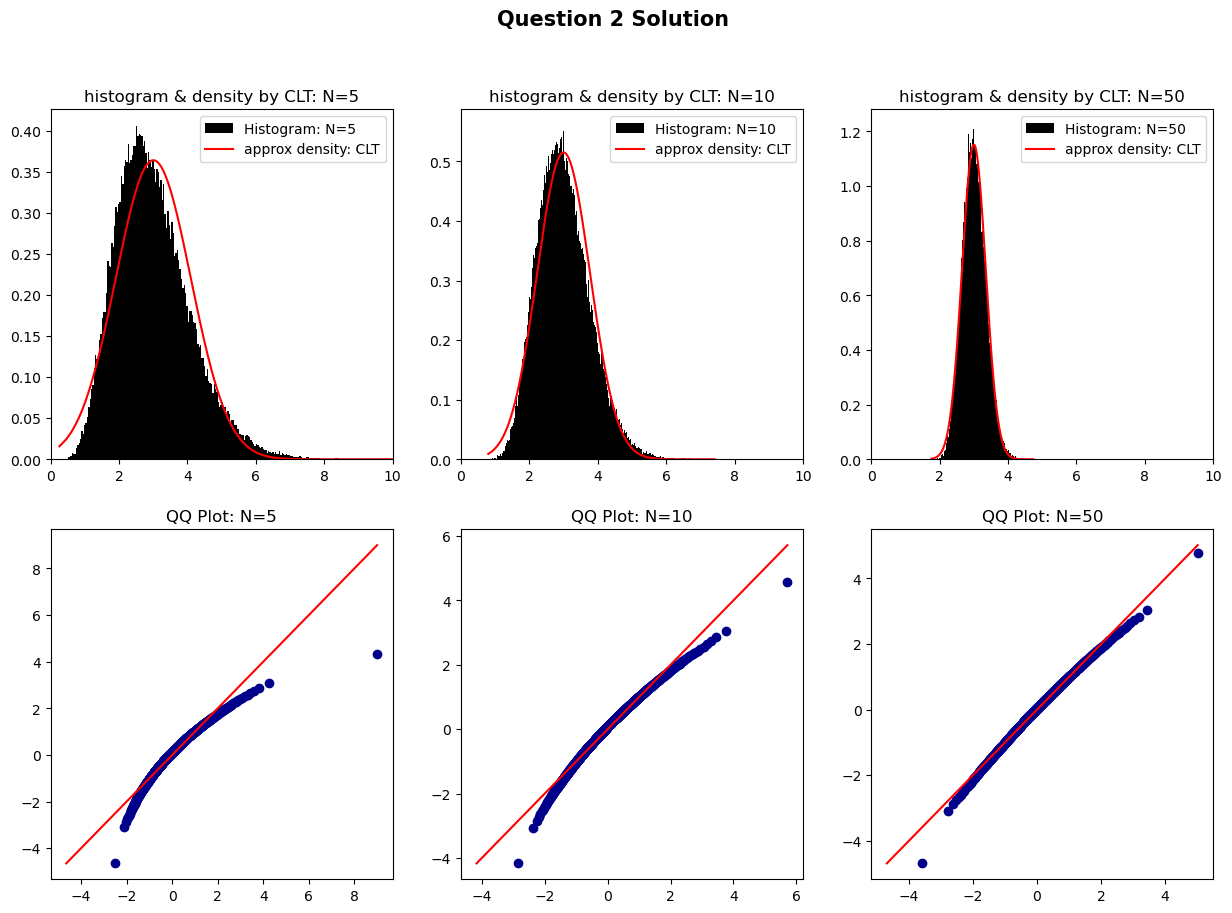

In [7]:
# Create a 2-by-3 array of subplots. 
fig, ((ax0,ax1,ax2), (ax3,ax4,ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Question 2 Solution', fontsize=15, fontweight='bold')

k=3

# plot histogram and approximate density of the distribution of sample averages which is given by the CLT 
n = 0 # for N=5
mean = k
var = np.sqrt(2*k/N[n])
x0 = np.sort(means[n])
y0 = scipy.stats.norm.pdf(np.sort(means[n]), loc=mean, scale=var)
ax0.hist(means[n], density=True, bins = int(np.sqrt(len(means[n]))), color='black', label='Histogram: N=5')
ax0.set(title='histogram & density by CLT: N=5')
ax0.axis(xmin=0, xmax=10)
ax0.plot(x0, y0, color='red', label='approx density: CLT');
ax0.legend(); 
# QQ plot of the sample means versus their approximate distribution n=5
q1_0, q2_0, min_0, max_0 = pyqqplot(np.sort(means[n]), np.random.normal(size=len(np.sort(means[n])), loc=mean, scale=var))
ax3.scatter(q1_0, q2_0, color='darkblue')
ax3.plot([min_0, max_0], [min_0, max_0], color='r')
ax3.set(title= f'QQ Plot: N={N[n]}');

# plot histogram and approximate density of the distribution of sample averages which is given by the CLT 
n = 1 # for N=10
mean = k
var = np.sqrt(2*k/N[n])
x1 = np.sort(means[n])
y1 = scipy.stats.norm.pdf(np.sort(means[n]), loc=mean, scale=var)
ax1.hist(means[n], density=True, bins = int(np.sqrt(len(means[n]))), color='black', label='Histogram: N=10')
ax1.set(title='histogram & density by CLT: N=10')
ax1.axis(xmin=0, xmax=10)
ax1.plot(x1, y1, color='red', label='approx density: CLT');
ax1.legend(); 
# QQ plot of the sample means versus their approximate distribution n=5
q1_1, q2_1, min_1, max_1 = pyqqplot(np.sort(means[n]), np.random.normal(size=len(np.sort(means[n])), loc=mean, scale=var))
ax4.scatter(q1_1, q2_1, color='darkblue')
ax4.plot([min_1, max_1], [min_1, max_1], color='r')
ax4.set(title= f'QQ Plot: N={N[n]}');

# plot histogram and approximate density of the distribution of sample averages which is given by the CLT 
n = 2 # for N = 50
mean = k
var = np.sqrt(2*k/N[n])
x2 = np.sort(means[n])
y2 = scipy.stats.norm.pdf(np.sort(means[n]), loc=mean, scale=var)
ax2.hist(means[n], density=True, bins = int(np.sqrt(len(means[n]))), color='black', label='Histogram: N=50')
ax2.set(title='histogram & density by CLT: N=50')
ax2.axis(xmin=0, xmax=10)
ax2.plot(x2, y2, color='red', label='approx density: CLT');
ax2.legend(); 
# QQ plot of the sample means versus their approximate distribution n=5
q1_2, q2_2, min_2, max_2 = pyqqplot(np.sort(means[n]), np.random.normal(size=len(np.sort(means[n])), loc=mean, scale=var))
ax5.scatter(q1_2, q2_2, color='darkblue')
ax5.plot([min_2, max_2], [min_2, max_2], color='r')
ax5.set(title= f'QQ Plot: N={N[n]}');

## For the value of N=50, the approximate density of sample means given by the CLT is indistinguishable from the actual density plotted in Q1.

# Question 3 Solution:

## $H_{0}$ is that the number of COVID-positive children in a class is still modelled by a binomial distribution Binom(30,p) with p=0.1 and there is no significant change in it.

Study with 4 classes:

Total number of reported cases: 20

$H_{0}$ is sampling from binom(120, 0.1) and $\alpha$ = 0.95 (95%)

In [8]:
alpha = 0.95
display(1 - alpha)

0.050000000000000044

### The probability under $H_{0}$ of having observed 20 cases:

In [9]:
p_value_1 = scipy.stats.binom.pmf(20, 120, 0.1)
display(p_value_1) #The probability under Ho of having observed 20 cases

0.007825579711977095

In [10]:
display(p_value_1 < (1 - alpha))

True

### The probability under $H_{0}$ of having observed an outcome at least as extreme as 20 cases:

In [11]:
p_value_2 = 1 - binom.cdf(20, 120, 0.1)
display(p_value_2) #The probability under Ho of having observed an outcome at least as extreme as 20 cases

0.007941192248396955

In [12]:
display(p_value_2 < (1 - alpha))

True

## $H_{0}$ is rejected since p < 1 - $\alpha$, in both the cases. 

## There have been significant changes in the number of COVID-positive students in each class since the last time this study was conducted. 20 cases have been reported in the study with just 4 classes of students, and the probability of that happening previously was 0.078, which is extremely low. Therefore, we can conclude that there has been a significant increase in the number of COVID-positive students in each class.

Now, classes = 300, N = 9000

Total observed cases: 945

$H_{0}$ is sampling from binom(30, 0.1) and $\alpha$ = 0.95 (95%)

## Due to the computationally costly nature of the process and the large number of classes, it is no longer practical to use an exact test using a binomial distribution where N = 9000

In [13]:
alpha = 0.95
display(1 - alpha)

0.050000000000000044

### Theoretical mean under $H_{0}$ :

In [14]:
# theoretical mean per class
theoretical_mean = scipy.stats.binom.mean(30, 0.1)
print(f'theoretical mean per class: {theoretical_mean}')

theoretical mean per class: 3.0


### Observed sample mean:

In [15]:
# observed mean per class
observed_mean = 945/300     # observed cases / number of classes
print(f'observed mean per class: {observed_mean}')

observed mean per class: 3.15


### Sample size:

In [16]:
# sample size (number of classes in this case)
sample_size = 300
print(f'sample size: {sample_size}')

sample size: 300


### Variance of Binom (30, p) :

In [17]:
# variance per class
theoretical_var = scipy.stats.binom.var(30, 0.1)
print(f'theoretical variance per class: {theoretical_var}')

theoretical variance per class: 2.7


In [18]:
theoretical_std = np.sqrt(theoretical_var)
print(f'theoretical standard deviation per class: {theoretical_std}')

theoretical standard deviation per class: 1.6431676725154984


### Z-statistic:

In [19]:
z_statistic = np.sqrt(sample_size)*((theoretical_mean - observed_mean) / (theoretical_std))
display(z_statistic)

-1.5811388300841887

### p-value:

In [20]:
p_value = scipy.stats.norm.cdf(z_statistic, 0, 1)
display(p_value)

0.05692314900332913

In [21]:
p_value < (1-alpha)

False

## $H_{0}$ cannot be rejected as p-value > 1 - $\alpha$

## As a result, it can be said that when testing for a larger number of classes, the number of COVID-positive students in a class is still modelled by the binomial distribution Binom(30,p) with p=0.1

## The result is different when tested for less number of classes i.e. 4 classes above.